In [1]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

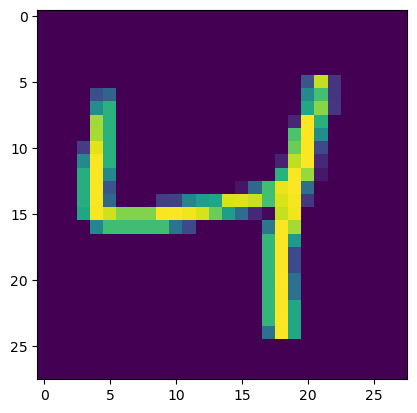

In [3]:
# This is the third element in our training data
import matplotlib.pyplot as plt 
plt.imshow(X_train[2])

In [4]:
# Normalize all the X values to bring them in range between 0 to 1 to converge our moel faster
X_train = X_train/255
X_test = X_test/255

In [5]:
model = Sequential()

''' First, we have to flatten our training data from 28 * 28
    into 784 inputs
'''
model.add(Flatten(input_shape=(28, 28))) # converts our data into 784 inputs
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')

In [7]:
model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - loss: 0.4701 - val_loss: 0.1523
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step - loss: 0.1395 - val_loss: 0.1143
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - loss: 0.0915 - val_loss: 0.0980
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - loss: 0.0648 - val_loss: 0.0890
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - loss: 0.0502 - val_loss: 0.0845
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - loss: 0.0370 - val_loss: 0.0879
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - loss: 0.0298 - val_loss: 0.0899
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - loss: 0.0233 - val_loss: 0.0871
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - loss: 0.0195 - val_loss: 0.0876
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step - loss: 0.0145 - val_loss: 0.1052
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - loss: 0.0146 - val_loss: 0.0999
Epoch 12

In [8]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step


In [9]:
y_pred = y_pred.argmax(axis=1)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9787

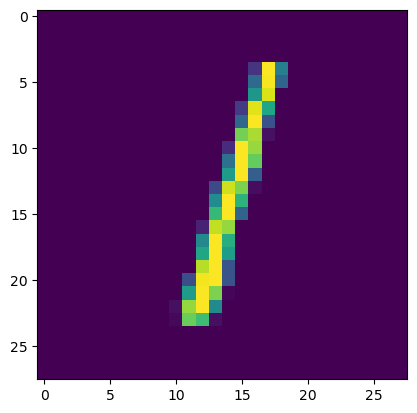

In [18]:
plt.imshow(X_test[2])

In [20]:
model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([1])

In [21]:
y_pred[2]

1